In [1]:
path_figure = '/Users/lsimpson/Desktop/GitHub/Figures/'
from classo import *
import numpy as np

# Combo data

## Building matrices 

In [2]:
path = path_figure + 'exampleCOMBO/'
X0  = csv_to_mat('COMBO_data/GeneraCounts.csv',begin=0).astype(float)
X_C = csv_to_mat('COMBO_data/CaloriData.csv',begin=0).astype(float)
X_F = csv_to_mat('COMBO_data/FatData.csv',begin=0).astype(float)
y   = csv_to_mat('COMBO_data/BMI.csv',begin=0).astype(float)[:,0]
labels  = csv_to_mat('COMBO_data/GeneraPhylo.csv').astype(str)[:,-1]

y   = y - np.mean(y) #BMI data (n=96)
X_C = X_C - np.mean(X_C, axis=0)  #Covariate data (Calorie)
X_F = X_F - np.mean(X_F, axis=0)  #Covariate data (Fat)
X0 = clr(X0, 1 / 2).T

X      = np.concatenate((X0, X_C, X_F, np.ones((len(X0), 1))), axis=1) # Joint microbiome and covariate data and offset
label = np.concatenate([labels,np.array(['Calorie','Fat','Bias'])])
C = np.ones((1,len(X[0])))
C[0,-1],C[0,-2],C[0,-3] = 0.,0.,0.

X.shape

(96, 90)

## Create classo instance and change parameters 

In [3]:
problem = classo_problem(X,y,C, label=label)

problem.model_selection.LAMfixed                    = True
problem.model_selection.StabSelparameters.method      = 'lam'
problem.model_selection.PATH = True

## R1

 
 
FORMULATION: R1
 
MODEL SELECTION COMPUTED:  
     Lambda fixed
     Path
     Stability selection
 
LAMBDA FIXED PARAMETERS: 
     numerical_method = Path-Alg
     rescaled lam : True
     threshold = 0.041
     lam : theoretical
     theoretical_lam = 0.1997
 
PATH PARAMETERS: 
     numerical_method : Path-Alg
     Npath = 40
     lamin = 0.013
     lamax = 1.0
 
STABILITY SELECTION PARAMETERS: 
     numerical_method : Path-Alg
     method : lam
     B = 50
     q = 10
     percent_nS = 0.5
     threshold = 0.7
     lam = theoretical
     theoretical_lam = 0.2824
 

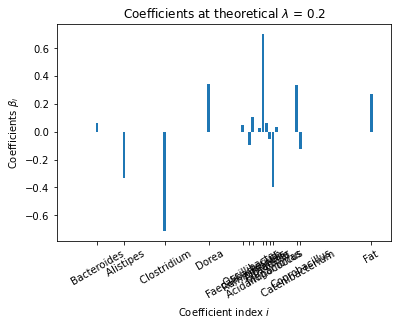

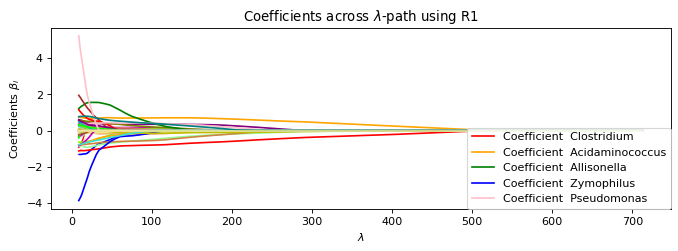

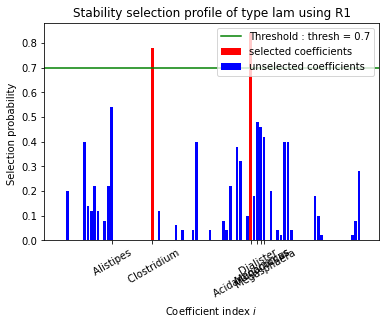

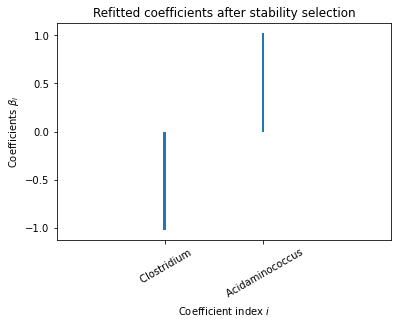


 LAMBDA FIXED : 
   Selected variables :   Bacteroides     Alistipes     Clostridium     Dorea     Faecalibacterium     Oscillibacter     Ruminococcus     Acidaminococcus     Allisonella     Dialister     Megamonas     Catenibacterium     Coprobacillus    Fat    
   Running time :  0.012s

 PATH COMPUTATION : 
   Running time :  0.166s

 STABILITY SELECTION : 
   Selected variables :   Clostridium     Acidaminococcus    
   Running time :  0.656s



In [4]:
problem.formulation.concomitant = False
problem.solve()
problem.solution.PATH.save = path+'R1-'
problem.solution.StabSel.save1 = path+'R1-StabSel'
problem.solution.StabSel.save3 = path+'R1-StabSel-beta'
print(problem, problem.solution)

## R2

 
 
FORMULATION: R2
 
MODEL SELECTION COMPUTED:  
     Lambda fixed
     Path
     Stability selection
 
LAMBDA FIXED PARAMETERS: 
     numerical_method = Path-Alg
     rescaled lam : True
     threshold = 0.041
     lam : theoretical
     theoretical_lam = 0.1997
 
PATH PARAMETERS: 
     numerical_method : Path-Alg
     Npath = 40
     lamin = 0.013
     lamax = 1.0
 
STABILITY SELECTION PARAMETERS: 
     numerical_method : Path-Alg
     method : lam
     B = 50
     q = 10
     percent_nS = 0.5
     threshold = 0.7
     lam = theoretical
     theoretical_lam = 0.2824
 

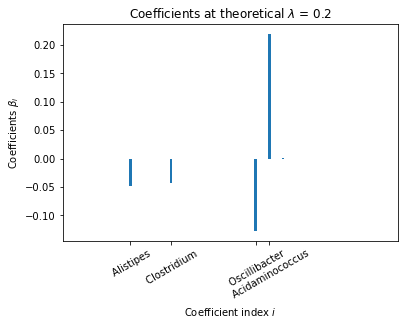

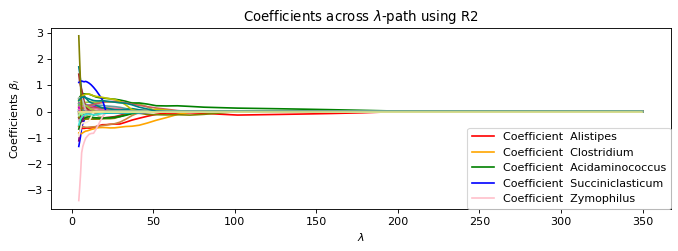

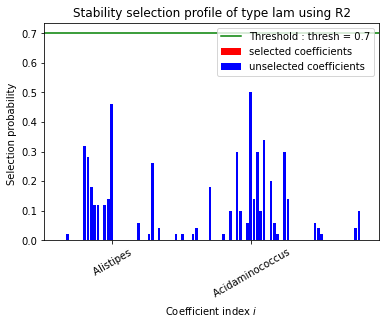

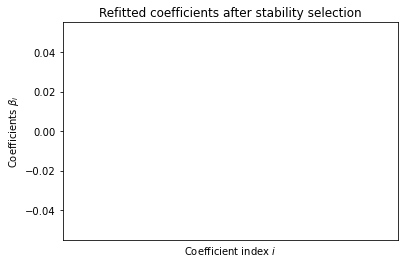


 LAMBDA FIXED : 
   Selected variables :   Alistipes     Clostridium     Oscillibacter     Acidaminococcus    
   Running time :  0.067s

 PATH COMPUTATION : 
   Running time :  0.746s

 STABILITY SELECTION : 
   Selected variables :  
   Running time :  2.654s



In [5]:
problem.formulation.huber = True
problem.solve()

problem.solution.PATH.save = path+'R2-'
problem.solution.StabSel.save1 = path+'R2-StabSel'
problem.solution.StabSel.save3 = path+'R2-StabSel-beta'
print(problem, problem.solution)

## R3

 
 
FORMULATION: R3
 
MODEL SELECTION COMPUTED:  
     Lambda fixed
     Path
     Stability selection
 
LAMBDA FIXED PARAMETERS: 
     numerical_method = Path-Alg
     rescaled lam : True
     threshold = 0.041
     lam : theoretical
     theoretical_lam = 0.1997
 
PATH PARAMETERS: 
     numerical_method : Path-Alg
     Npath = 40
     lamin = 0.013
     lamax = 1.0
 
STABILITY SELECTION PARAMETERS: 
     numerical_method : Path-Alg
     method : lam
     B = 50
     q = 10
     percent_nS = 0.5
     threshold = 0.7
     lam = theoretical
     theoretical_lam = 0.2824
 

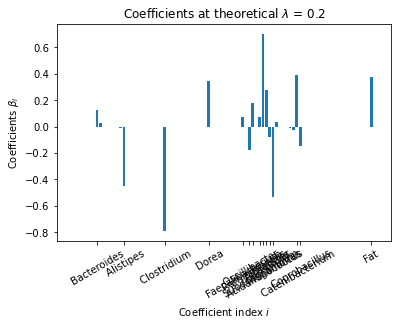

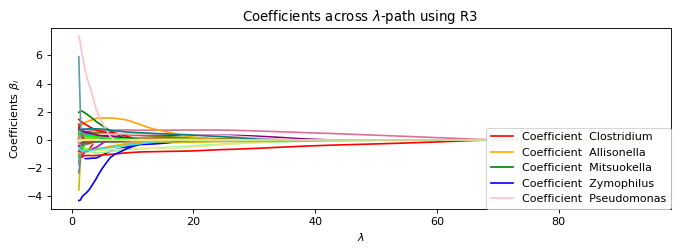

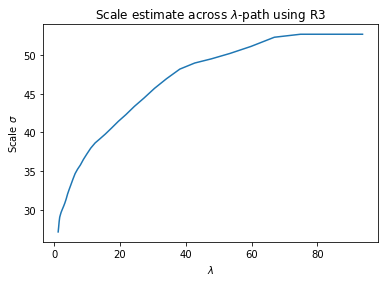

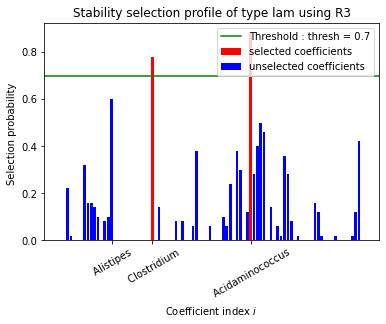

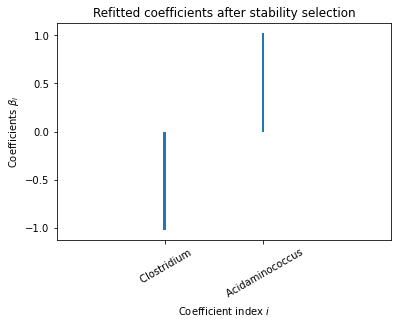


 LAMBDA FIXED : 
   Sigma  =  0.857
   Selected variables :   Bacteroides     Alistipes     Clostridium     Dorea     Faecalibacterium     Oscillibacter     Ruminococcus     Subdoligranulum     Acidaminococcus     Allisonella     Dialister     Megamonas     Catenibacterium     Coprobacillus    Fat    
   Running time :  0.018s

 PATH COMPUTATION : 
   Running time :  0.19s

 STABILITY SELECTION : 
   Selected variables :   Clostridium     Acidaminococcus    
   Running time :  1.24s



In [11]:
problem.formulation.concomitant = True
problem.formulation.huber = False
problem.model_selection.StabSelparameters.threshold_label = 0.5

problem.solve()
problem.solution.PATH.save = path+'R3-'
problem.solution.StabSel.save1 = path+'R3-StabSel'
problem.solution.StabSel.save3 = path+'R3-StabSel-beta'
print(problem, problem.solution)

## R4

 
 
FORMULATION: R4
 
MODEL SELECTION COMPUTED:  
     Lambda fixed
     Path
     Stability selection
 
LAMBDA FIXED PARAMETERS: 
     numerical_method = Path-Alg
     rescaled lam : True
     threshold = 0.041
     lam : theoretical
     theoretical_lam = 0.1997
 
PATH PARAMETERS: 
     numerical_method : Path-Alg
     Npath = 40
     lamin = 0.013
     lamax = 1.0
 
STABILITY SELECTION PARAMETERS: 
     numerical_method : Path-Alg
     method : lam
     B = 50
     q = 10
     percent_nS = 0.5
     threshold = 0.7
     lam = theoretical
     theoretical_lam = 0.2824
 

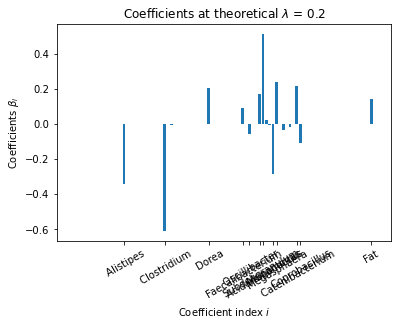

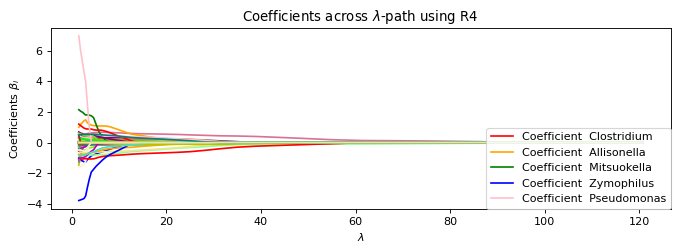

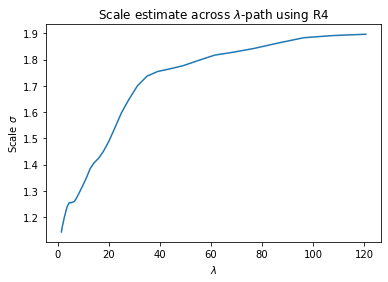

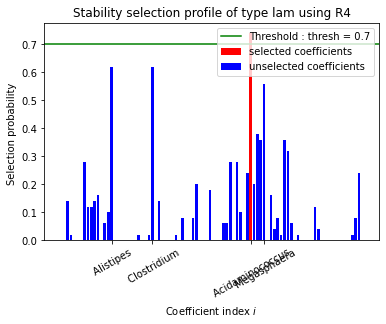

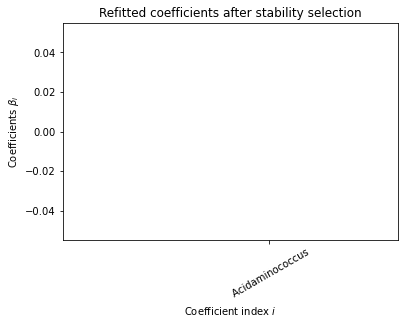


 LAMBDA FIXED : 
   Sigma  =  2.269
   Selected variables :   Alistipes     Clostridium     Dorea     Faecalibacterium     Oscillibacter     Subdoligranulum     Acidaminococcus     Megamonas     Megasphaera     Catenibacterium     Coprobacillus    Fat    
   Running time :  0.056s

 PATH COMPUTATION : 
   Running time :  53.715s

 STABILITY SELECTION : 
   Selected variables :   Acidaminococcus    
   Running time :  4.365s



In [12]:
problem.formulation.huber = True
problem.model_selection.StabSelparameters.seed = 123
problem.solve()
problem.solution.PATH.save = path+'R4-'
problem.solution.StabSel.save1 = path+'R4-StabSel'
problem.solution.StabSel.save3 = path+'R4-StabSel-beta'
print(problem, problem.solution)

# Combo data

## Building matrices 

In [2]:
path = path_figure + 'exampleCOMBO/'
X0  = csv_to_mat('COMBO_data/GeneraCounts.csv',begin=0).astype(float)
X_C = csv_to_mat('COMBO_data/CaloriData.csv',begin=0).astype(float)
X_F = csv_to_mat('COMBO_data/FatData.csv',begin=0).astype(float)
y   = csv_to_mat('COMBO_data/BMI.csv',begin=0).astype(float)[:,0]
labels  = csv_to_mat('COMBO_data/GeneraPhylo.csv').astype(str)[:,-1]

y   = y - np.mean(y) #BMI data (n=96)
X_C = X_C - np.mean(X_C, axis=0)  #Covariate data (Calorie)
X_F = X_F - np.mean(X_F, axis=0)  #Covariate data (Fat)
X0 = clr(X0, 1 / 2).T

X      = np.concatenate((X0, X_C, X_F, np.ones((len(X0), 1))), axis=1) # Joint microbiome and covariate data and offset
label = np.concatenate([labels,np.array(['Calorie','Fat','Bias'])])
C = np.ones((1,len(X[0])))
C[0,-1],C[0,-2],C[0,-3] = 0.,0.,0.

X.shape

(96, 90)

## Create classo instance and change parameters 

In [3]:
problem = classo_problem(X,y,C, label=label)

problem.model_selection.LAMfixed                    = True
problem.model_selection.StabSelparameters.method      = 'lam'
problem.model_selection.PATH = True

## R1

 
 
FORMULATION: R1
 
MODEL SELECTION COMPUTED:  
     Lambda fixed
     Path
     Stability selection
 
LAMBDA FIXED PARAMETERS: 
     numerical_method = Path-Alg
     rescaled lam : True
     threshold = 0.041
     lam : theoretical
     theoretical_lam = 0.1997
 
PATH PARAMETERS: 
     numerical_method : Path-Alg
     Npath = 40
     lamin = 0.013
     lamax = 1.0
 
STABILITY SELECTION PARAMETERS: 
     numerical_method : Path-Alg
     method : lam
     B = 50
     q = 10
     percent_nS = 0.5
     threshold = 0.7
     lam = theoretical
     theoretical_lam = 0.2824
 

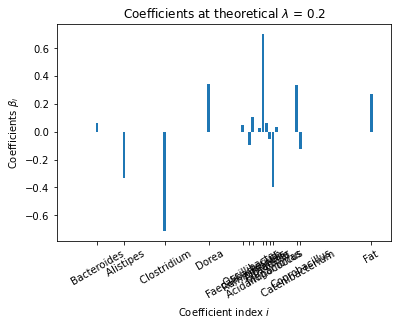

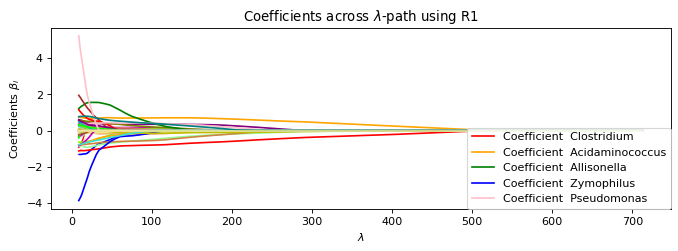

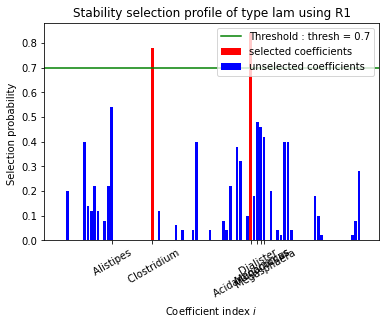

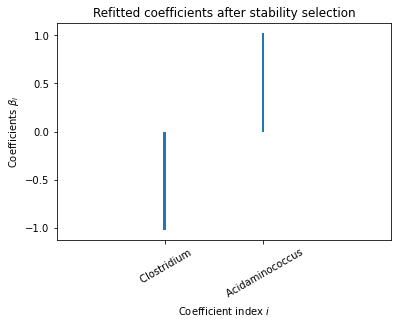


 LAMBDA FIXED : 
   Selected variables :   Bacteroides     Alistipes     Clostridium     Dorea     Faecalibacterium     Oscillibacter     Ruminococcus     Acidaminococcus     Allisonella     Dialister     Megamonas     Catenibacterium     Coprobacillus    Fat    
   Running time :  0.012s

 PATH COMPUTATION : 
   Running time :  0.166s

 STABILITY SELECTION : 
   Selected variables :   Clostridium     Acidaminococcus    
   Running time :  0.656s



In [4]:
problem.formulation.concomitant = False
problem.solve()
problem.solution.PATH.save = path+'R1-'
problem.solution.StabSel.save1 = path+'R1-StabSel'
problem.solution.StabSel.save3 = path+'R1-StabSel-beta'
print(problem, problem.solution)

## R2

 
 
FORMULATION: R2
 
MODEL SELECTION COMPUTED:  
     Lambda fixed
     Path
     Stability selection
 
LAMBDA FIXED PARAMETERS: 
     numerical_method = Path-Alg
     rescaled lam : True
     threshold = 0.041
     lam : theoretical
     theoretical_lam = 0.1997
 
PATH PARAMETERS: 
     numerical_method : Path-Alg
     Npath = 40
     lamin = 0.013
     lamax = 1.0
 
STABILITY SELECTION PARAMETERS: 
     numerical_method : Path-Alg
     method : lam
     B = 50
     q = 10
     percent_nS = 0.5
     threshold = 0.7
     lam = theoretical
     theoretical_lam = 0.2824
 

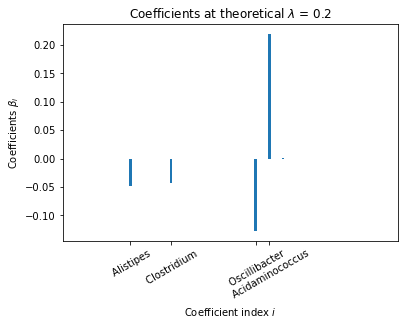

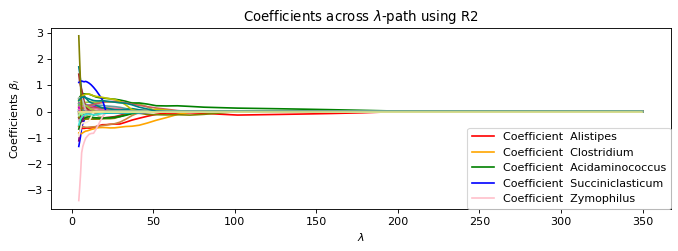

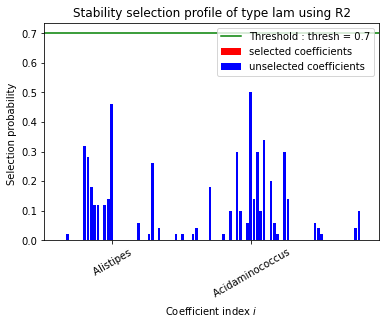

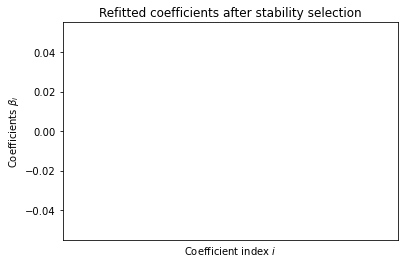


 LAMBDA FIXED : 
   Selected variables :   Alistipes     Clostridium     Oscillibacter     Acidaminococcus    
   Running time :  0.067s

 PATH COMPUTATION : 
   Running time :  0.746s

 STABILITY SELECTION : 
   Selected variables :  
   Running time :  2.654s



In [5]:
problem.formulation.huber = True
problem.solve()

problem.solution.PATH.save = path+'R2-'
problem.solution.StabSel.save1 = path+'R2-StabSel'
problem.solution.StabSel.save3 = path+'R2-StabSel-beta'
print(problem, problem.solution)

## R3

 
 
FORMULATION: R3
 
MODEL SELECTION COMPUTED:  
     Lambda fixed
     Path
     Stability selection
 
LAMBDA FIXED PARAMETERS: 
     numerical_method = Path-Alg
     rescaled lam : True
     threshold = 0.041
     lam : theoretical
     theoretical_lam = 0.1997
 
PATH PARAMETERS: 
     numerical_method : Path-Alg
     Npath = 40
     lamin = 0.013
     lamax = 1.0
 
STABILITY SELECTION PARAMETERS: 
     numerical_method : Path-Alg
     method : lam
     B = 50
     q = 10
     percent_nS = 0.5
     threshold = 0.7
     lam = theoretical
     theoretical_lam = 0.2824
 

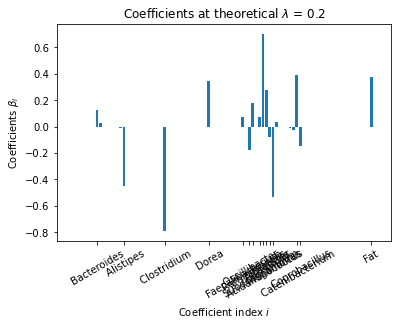

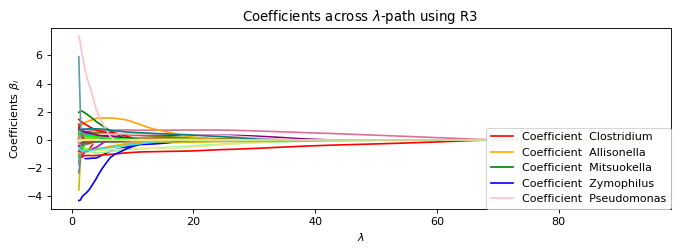

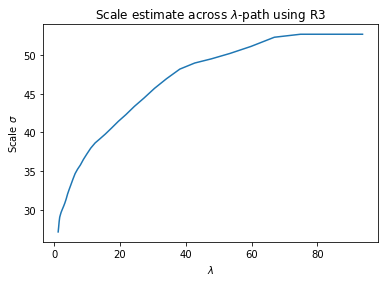

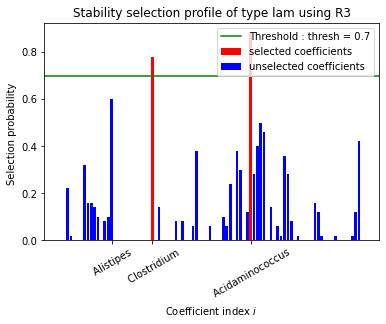

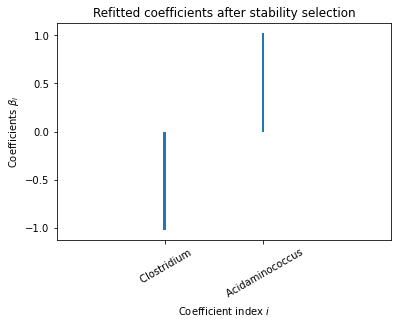


 LAMBDA FIXED : 
   Sigma  =  0.857
   Selected variables :   Bacteroides     Alistipes     Clostridium     Dorea     Faecalibacterium     Oscillibacter     Ruminococcus     Subdoligranulum     Acidaminococcus     Allisonella     Dialister     Megamonas     Catenibacterium     Coprobacillus    Fat    
   Running time :  0.018s

 PATH COMPUTATION : 
   Running time :  0.19s

 STABILITY SELECTION : 
   Selected variables :   Clostridium     Acidaminococcus    
   Running time :  1.24s



In [11]:
problem.formulation.concomitant = True
problem.formulation.huber = False
problem.model_selection.StabSelparameters.threshold_label = 0.5

problem.solve()
problem.solution.PATH.save = path+'R3-'
problem.solution.StabSel.save1 = path+'R3-StabSel'
problem.solution.StabSel.save3 = path+'R3-StabSel-beta'
print(problem, problem.solution)

## R4

In [ ]:
problem.formulation.huber = True
problem.model_selection.StabSelparameters.seed = 123
problem.solve()
problem.solution.PATH.save = path+'R4-'
problem.solution.StabSel.save1 = path+'R4-StabSel'
problem.solution.StabSel.save3 = path+'R4-StabSel-beta'
print(problem, problem.solution)

# pH data

## Building matrices 

In [8]:
path = path_figure + 'examplepH/'
pH = sio.loadmat('pH_data/pHData.mat')
tax = sio.loadmat('pH_data/taxTablepHData.mat')['None'][0]

X,Y_uncent = pH['X'],pH['Y'].T[0]
y = Y_uncent-np.mean(Y_uncent) # Center Y

X.shape

NameError: name 'sio' is not defined

## Create classo instance and change parameters 

In [ ]:
problem = classo_problem(X,y)

problem.model_selection.LAMfixed                    = True
problem.model_selection.StabSelparameters.method      = 'lam'
problem.model_selection.PATH = True

## R1

In [ ]:
problem.formulation.concomitant = False
problem.solve()
problem.solution.PATH.save = path+'R3-'
problem.solution.StabSel.save1 = path+'R3-StabSel'
problem.solution.StabSel.save3 = path+'R3-StabSel-beta'
print(problem, problem.solution)

## R2

In [ ]:
problem.formulation.huber = True
problem.solve()

problem.solution.PATH.save = path+'R4-'
problem.solution.StabSel.save1 = path+'R4-StabSel'
problem.solution.StabSel.save3 = path+'R4-StabSel-beta'
print(problem, problem.solution)

## R3

In [ ]:
problem.formulation.concomitant = True
problem.formulation.huber = False

problem.solve()
problem.solution.PATH.save = path+'R2-'
problem.solution.StabSel.save1 = path+'R2-StabSel'
problem.solution.StabSel.save3 = path+'R2-StabSel-beta'
print(problem, problem.solution)

## R4

In [ ]:
problem.formulation.huber = True
problem.solve()
problem.solution.PATH.save = path+'R1-'
problem.solution.StabSel.save1 = path+'R1-StabSel'
problem.solution.StabSel.save3 = path+'R1-StabSel-beta'
print(problem, problem.solution)